In [2]:
# Before working with this tutorial, we recommend going through the previous one, 
# 'No1_Getting_started--Local(basics)', where the steps of producing potential-density pair 
# and many other output quantities were described for the Solar neighbourhood model. 
# Here we follow the same steps, but everything is now generalized for other Galactocentric distances.

# As before, we start with importing jjmodel classes, functions, and parameters:

import numpy as np 
from jjmodel.tools import Timer
from jjmodel.constants import tp
from jjmodel.iof import tab_reader
from jjmodel.input_ import p, a, inp
from jjmodel.funcs import IMF, SFR
from jjmodel.mwdisk import disk_builder
from jjmodel.populations import stellar_assemblies_r
from jjmodel.analysis import GetPopulations
from jjmodel.plotting import Plotting, PlotBlocks


In [3]:
# To build a global JJ model realization, the code stars from the Solar neighbourhood. 
# As usual, the Poisson-Boltzmann eq. is iteratively solved, and the derived self-consistent 
# potential-density pair is used to calculate the local thin-disk half-thickness hdeff and the thick-disk
# scale height ht. After that, all other radial bins are processed with the prescribed hdeff and ht,
# which play the role of 'boundary conditions' (by default, hdeff is constant at all R, but flaring can be allowed 
# (see parameters Rdf, Rf, and fkey in the manual on parameters). 
# Also, the radial variation of SFR, AMR, and the midplane densities of the model components are prescribed.     

if __name__ == '__main__':
    disk_builder(p,a,inp)


Results of this run will be saved to output/4R14_dR0.5_tutorial2_fehkey1pkey1_dm

Output directory tree created.

---Local run---

        Process 8.17  : exit, time: 0h 0m 0.65s


Input data saved.

Output data saved.

---Local run ended sucessfully---


---Global run---

        Process 6.0   : exit, time: 0h 0m 1.7s
        Process 7.0   : exit, time: 0h 0m 1.81s
        Process 5.0   : exit, time: 0h 0m 2.01s
        Process 4.0   : exit, time: 0h 0m 2.46s
        Process 6.5   : exit, time: 0h 0m 1.52s
        Process 7.5   : exit, time: 0h 0m 1.5s
        Process 5.5   : exit, time: 0h 0m 1.97s
        Process 8.0   : exit, time: 0h 0m 1.33s
        Process 4.5   : exit, time: 0h 0m 2.35s
        Process 9.0   : exit, time: 0h 0m 1.62s
        Process 10.0  : exit, time: 0h 0m 1.44s
        Process 8.5   : exit, time: 0h 0m 1.55s
        Process 11.0  : exit, time: 0h 0m 1.39s
        Process 9.5   : exit, time: 0h 0m 1.46s
        Process 10.5  : exit, time: 0h 0m 1.35s
        

In [4]:
# Then we create stellar assemblies (SA). 

# Define IMF 
M_low, M_up = 0.08, 100     # Msun
imf = IMF(M_low,M_up)
mass, Nmdm = imf.BPL_4slopes(p.a0,p.a1,p.a2,p.a3,p.m0,p.m1,p.m2)

# Then we call the function stellar_assemblies_r for Rsun and other radii R.
# Now, when we have many radial bins, this calculation can take a bit more time 
# (but still the calculation is very quick, ~5 min on 4 CPU cores for 20 R-bins with no spread in AMR).

timer = Timer()
t_start = timer.start()

# For the Solar neighbourhood at p.Rsun:
if __name__ == '__main__':
    stellar_assemblies_r(p.Rsun,p,a,inp['AMRd0'],inp['AMRt'],inp['SFRd0'],inp['SFRt0'],
                         p.sigmash,imf.number_stars,'Padova',3)
    
# For other distances at a.R:
for i in range(a.Rbins):
    indr = int(a.R[i]//p.dR - p.Rmin//p.dR)
    if __name__ == '__main__':
        stellar_assemblies_r(a.R[i],p,a,inp['AMRd'][indr],inp['AMRt'],inp['SFRd'][indr],inp['SFRt'][indr],
                             inp['SigmaR'][-1][indr],imf.number_stars,'Padova',3)
                             
print('\n',timer.stop(t_start))



Stellar population synthesis for R = 8.17 kpc:
Warning. Some of modeled metallicities (halo -- and this is valid for all R) are outside of Padova metallicity range [-2.2,0.5], 
i.e., the adopted best isochrones may be not representative.
	thin disk	thick disk	halo

Stellar population synthesis for R = 4.0 kpc:
	thin disk	thick disk	halo

Stellar population synthesis for R = 4.5 kpc:
	thin disk	thick disk	halo

Stellar population synthesis for R = 5.0 kpc:
	thin disk	thick disk	halo

Stellar population synthesis for R = 5.5 kpc:
	thin disk	thick disk	halo

Stellar population synthesis for R = 6.0 kpc:
	thin disk	thick disk	halo

Stellar population synthesis for R = 6.5 kpc:
	thin disk	thick disk	halo

Stellar population synthesis for R = 7.0 kpc:
	thin disk	thick disk	halo

Stellar population synthesis for R = 7.5 kpc:
	thin disk	thick disk	halo

Stellar population synthesis for R = 8.0 kpc:
	thin disk	thick disk	halo

Stellar population synthesis for R = 8.5 kpc:
	thin disk	thick disk

In [5]:
# And we select several subsamples which correspond to the well-defined populations,
# such as RC-, A-, and F-stars and G- and K-dwarfs. 

# Reminder about notations used in the code:

# MW stellar components                           Stellar populations
# 'd'   = thin disk                               'a'            = A stars 
# 't'   = thick disk                              'f'            = F stars
# 'sh'  = stellar halo                            'rc' or 'rc+'  = RC stars
# 'dt'  = thin + thick disk                       'gdw'          = G dwarfs
# 'tot' = thin + thick disk + stellar halo        'kdw'          = K dwarfs


mw_comp = ['d','t','sh']
kw = {'save':True}                             
kw_rc = {'save':True,'fig':True,'close':True}  # For RC, figures from the selection process are saved
R_array = [p.Rsun]
R_array.extend(a.R)

timer = Timer()
t_start = timer.start()

print('{:<11}'.format('R [kpc]'),'{:<11}'.format('RC stars'),'{:<11}'.format('A stars'),
      '{:<11}'.format('F stars'),'{:<11}'.format('G dwarfs'),'{:<11}'.format('K dwarfs'))

for i in range(a.Rbins+1): 
    
    print('{:<1}'.format(''),'{:<11}'.format(R_array[i]),'{:<1}'.format(''),end='')
    pop = GetPopulations('Padova',R_array[i],p,a)
    
    for k in range(len(mw_comp)):
        pop.rc_clean(mw_comp[k],**kw_rc)
        pop.a_stars(mw_comp[k],**kw)
        pop.f_stars(mw_comp[k],**kw)
        pop.g_dwarfs(mw_comp[k],**kw)
        pop.k_dwarfs(mw_comp[k],**kw)
        
    print('{:<11}'.format('x'),'{:<11}'.format('x'),'{:<11}'.format('x'),
          '{:<11}'.format('x'),'{:<11}'.format('x'))
      
print('\n',timer.stop(t_start))


R [kpc]     RC stars    A stars     F stars     G dwarfs    K dwarfs   
  8.17         x           x           x           x           x          
  4.0          x           x           x           x           x          
  4.5          x           x           x           x           x          
  5.0          x           x           x           x           x          
  5.5          x           x           x           x           x          
  6.0          x           x           x           x           x          
  6.5          x           x           x           x           x          
  7.0          x           x           x           x           x          
  7.5          x           x           x           x           x          
  8.0          x           x           x           x           x          
  8.5          x           x           x           x           x          
  9.0          x           x           x           x           x          
  9.5          x           x

(<Figure size 648x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe55f72f1c0>)

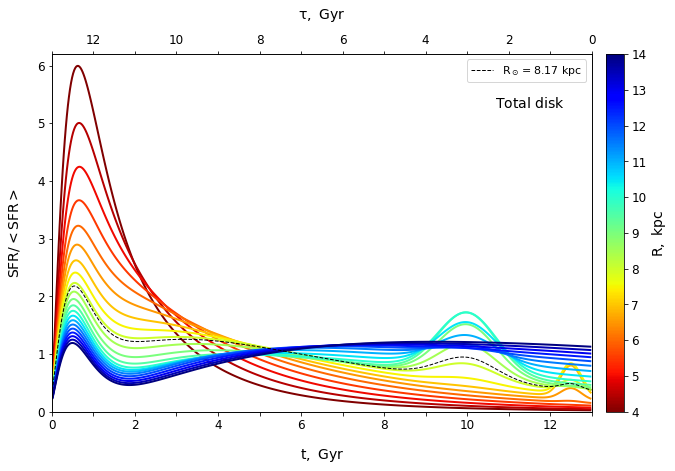

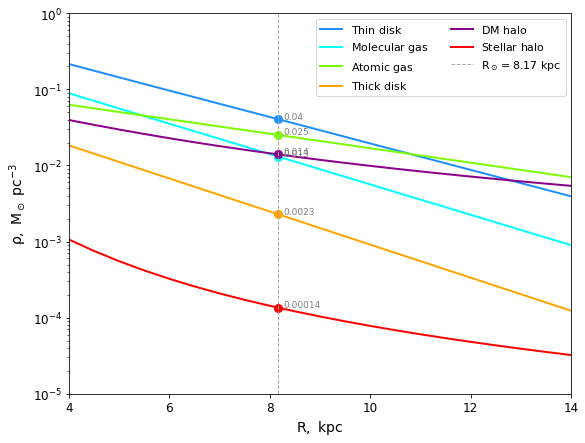

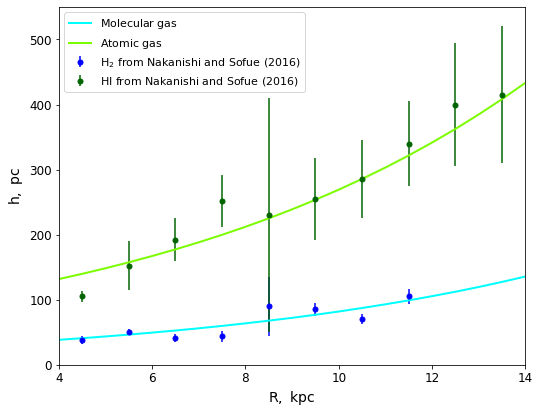

In [6]:
# From here, we start visualization of the model input and output with class Plotting.

P = Plotting(p,a,inp)    # Initialization

# --------------------------------------------------------------------------------------------------
# Input functions part1 
# --------------------------------------------------------------------------------------------------

# Assumed variation of SFR with R for the disk (thin and thick):
P.nsfr_plt('dt')    

# Assumed radial density profiles of the MW components:
P.rhor_plt()

# Assumed profiles of the gas scale heights (data from Sofue):
P.hr_gas_plt() 


(<Figure size 720x504 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe56eaaf7f0>)

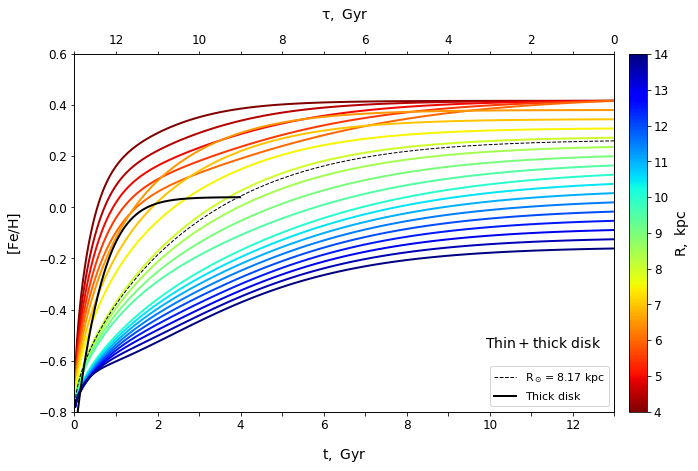

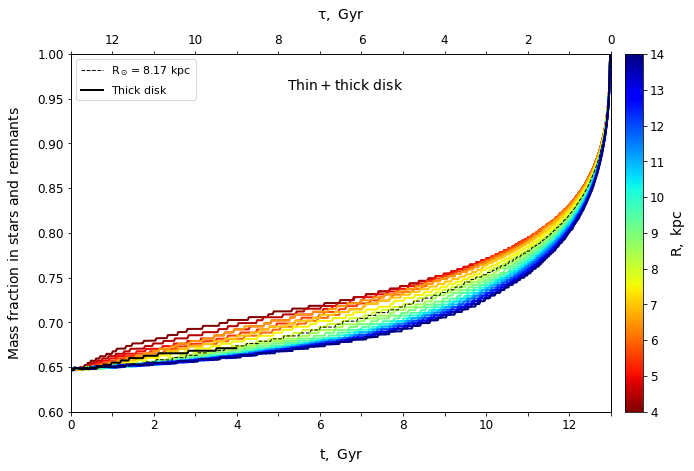

In [7]:
# --------------------------------------------------------------------------------------------------
# Input functions part2
# --------------------------------------------------------------------------------------------------

# Assumed variation of AMR with R for the disk: 
P.amrr_plt('dt')   

# Assumed variation of mass loss function g with R.
# g(R) is consistent with the adopted AMR(R) and corresponds to the four-slope broken power law (4BPL) IMF 
# with parameters from Sysoliatina and Just (2021) (see manual about parameters for more details). 
# Strictly speaking, if the IMF in the model changes, then also g(R) has to be recalculated using this new IMF 
# (with the chemical evolution code Chempy). But in practice, variation of the IMF influences g(R) only weakly. 
# Also, g(R) is itself one of the least important input functions of the JJ model in terms of the impact
# on the potential and density profiles. Therefore, it is quite safe to use the provided grid of the mass loss
# coefficients calculated for the 4BPL IMF (jjmodel/input/mass_loss) also with other IMF shapes.

P.gr_plt('dt') 


(<Figure size 864x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe56e1eb370>)

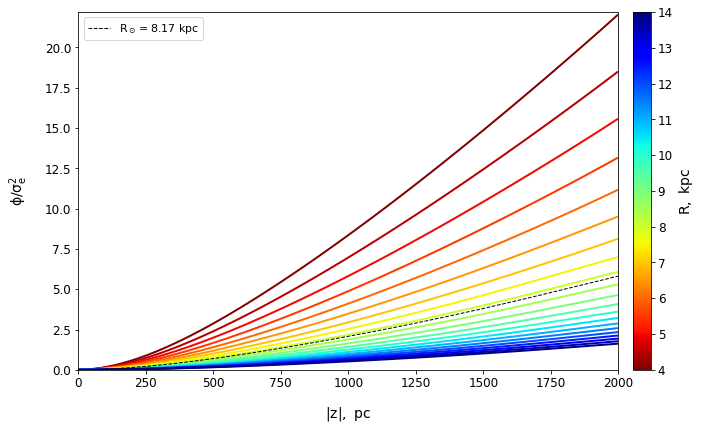

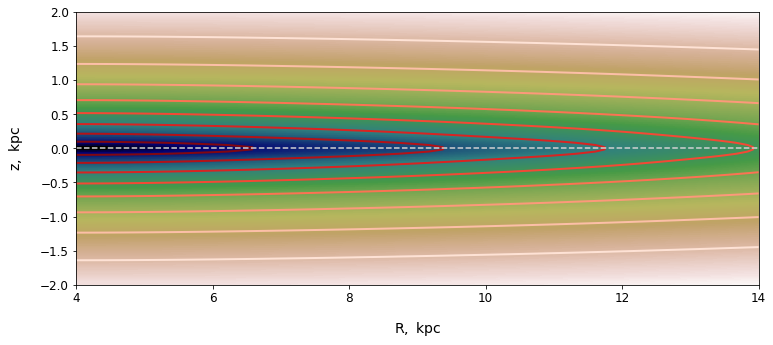

In [8]:
# --------------------------------------------------------------------------------------------------
# Potential and vertical force
# --------------------------------------------------------------------------------------------------

# The normalized vertical potential at the different R:
P.fi_plt()            

# Iso-potential lines in Rz-plane:
P.fi_iso_plt()              

# The vertical force can be plotted exactly in the same way as for the Solar neighbourhood, 
# just give some radius:
#radius = 10.5  # kpc
#P.kz_plt(radius)


(<Figure size 648x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe56dd4b3a0>)

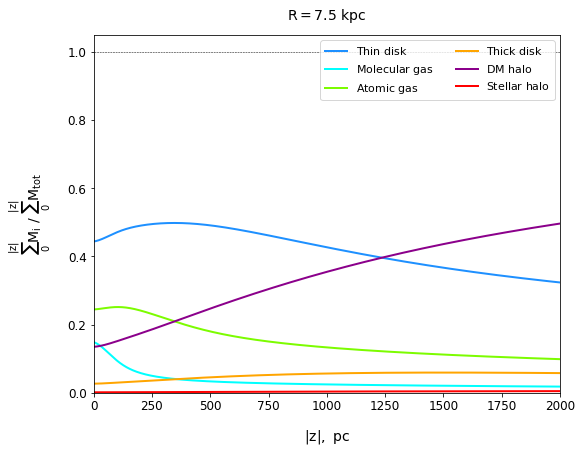

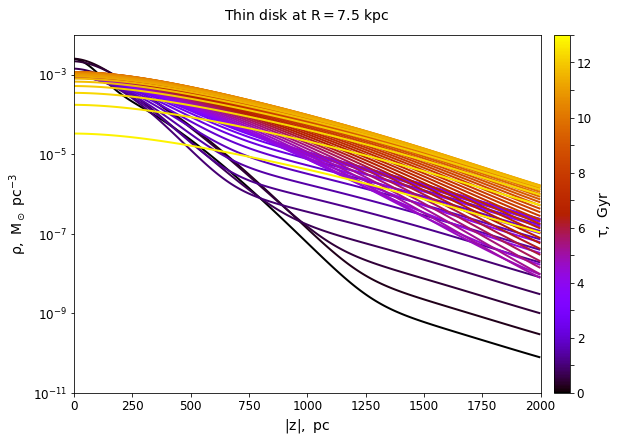

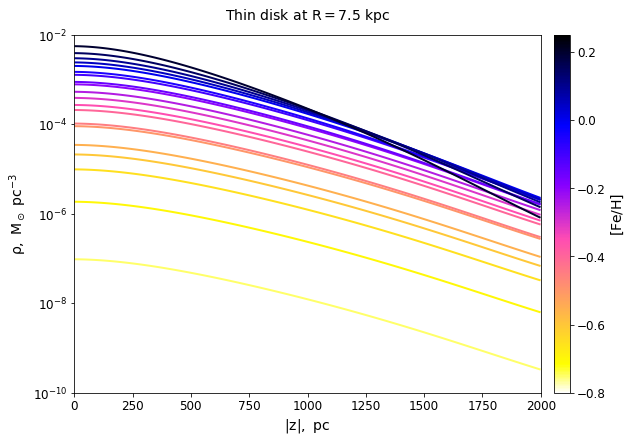

In [9]:
# --------------------------------------------------------------------------------------------------
# Vertical density profiles, part1
# --------------------------------------------------------------------------------------------------

# Density profiles can be plotted at the different radii, for different stellar populations, and 
# in the age and metallicity bins:

radius = 7.5                               # kpc, Galactocentric distance
ages = np.arange(0,tp+0.25,0.25)           # Gyr, set of age bins
mets = np.arange(-0.8,0.3,0.05)            # dex, set of metallicity bins

# Overall vertical density profiles (keywords 'normalized' and 'cumulative' are available):
P.rhoz_plt(radius,cumulative=True)

# Thin disk, age bins:
P.rhoz_monoage_plt('d',radius,ages,between=True)

# Thin disk, metallicity bins:
P.rhoz_monomet_plt('d',radius,mets)

# Try some more special cases:
#P.rhoz_monoage_plt('tot',radius,ages,between=True,mode_pop='gdw',number=True) 
#P.rhoz_monomet_plt('tot',radius,mets,mode_pop='rc',number=True) 


(<Figure size 648x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe55f4f4df0>)

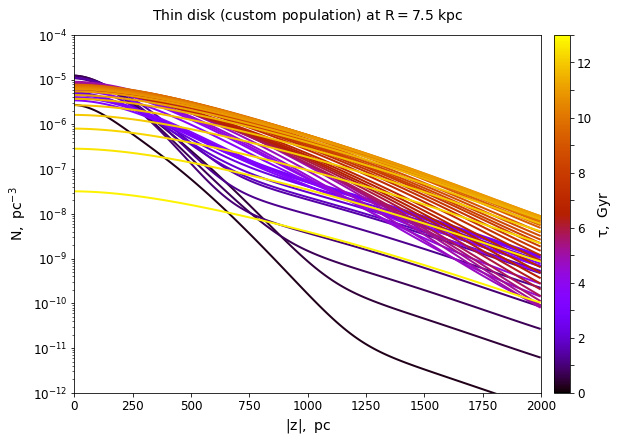

In [10]:
# --------------------------------------------------------------------------------------------------
# Vertical density profiles, part2
# --------------------------------------------------------------------------------------------------

# It is also possible to pass a custom table for plotting. For example, we select some population
# consisting of the thin-disk stars and defined with the cuts on logT and logg:

model_component = 'd'
pop = GetPopulations('Padova',radius,p,a)
tab_custom_d = pop.custom_population(model_component,['logT','logg'],
                                     [[np.log10(4e3),np.log10(5e3)],[2.5,4.5]])  # ranges for logT and logg

# Then we plot vertical profiles using the keyword tab.
# Note, that the model_component argument for rhoz_monoage_plt must be the same one, 
# which was used to select the population. 
# More examples on defining custom populations and using the keyword tab can be found in tutorial No.3 
# (to be created).

P.rhoz_monoage_plt(model_component,radius,ages,between=True,tab=tab_custom_d,number=True)


(<Figure size 648x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe55f204640>)

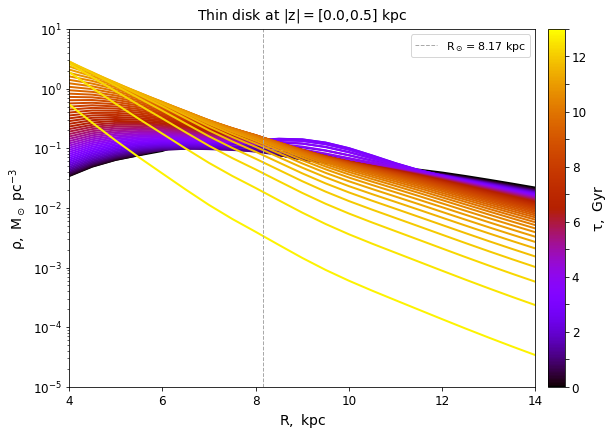

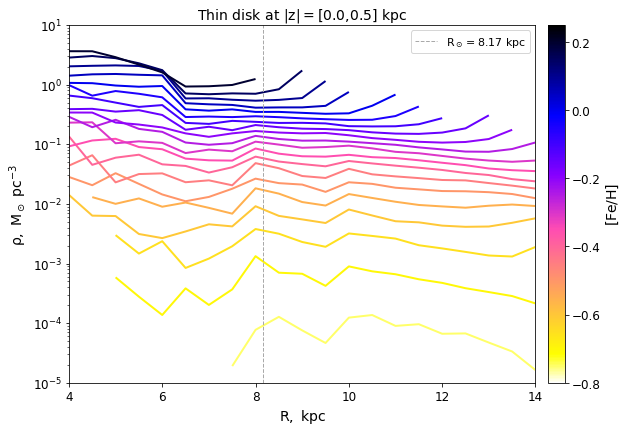

In [11]:
# --------------------------------------------------------------------------------------------------
# Radial density profiles
# --------------------------------------------------------------------------------------------------

# The overall radial density profiles of the disk, gas, halo, etc. constitute the model input (see plot above). 
# But with the vertical potential now known at each R, we can get a more detailed picture: 
# calculate radial densities of the model components or stellar populations in the age or 
# metallicity bins in some z-slice. 

z_slice = [0,500]                          # pc,  range of heights
ages = np.arange(0,tp+0.25,0.25)           # Gyr, set of ages to plot
mets = np.arange(-0.8,0.3,0.05)            # dex, set of metallicities


# Thin-dsik mono-age populations (if sigma=True, the surface density profiles are plotted): 
P.rhor_monoage_plt('d',z_slice,ages,between=True)          

# By analogy, for metallicity bins do:
P.rhor_monomet_plt('d',z_slice,mets)

# Try more special input:
#P.rhor_monoage_plt('tot',z_slice,ages,between=True,mode_pop='gdw',number=True)
#P.rhor_monomet_plt('tot',z_slice,mets,mode_pop='rc',number=True,sigma=True,cbar='hot') 


(<Figure size 720x504 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe56e03aa30>)

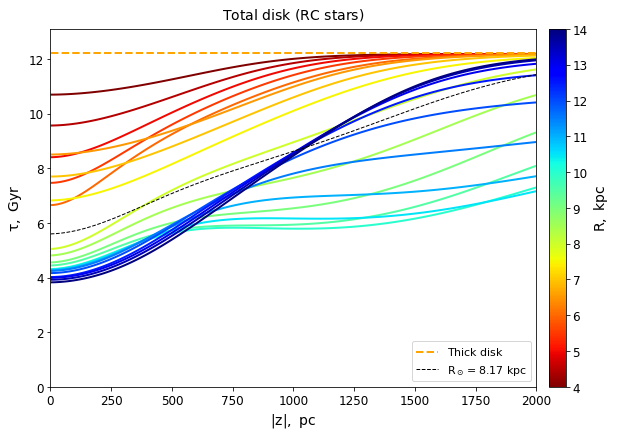

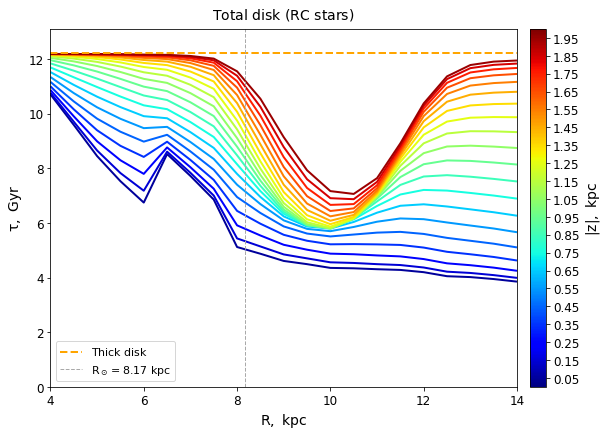

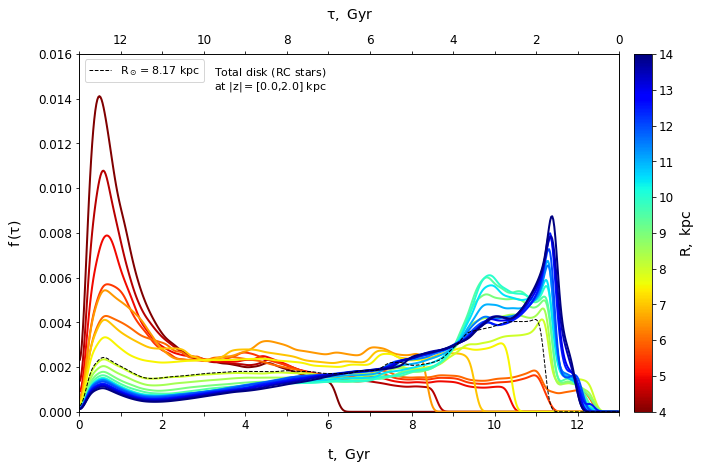

In [12]:
# --------------------------------------------------------------------------------------------------
# Ages
# --------------------------------------------------------------------------------------------------

# Vertical profiles of the mean age:
P.agez_plt('dt',mode_pop='rc',number=True)

# Some quantities, like the radial age profiles, can be plotted for a set of z-slices (z-bins):
z_slices = np.arange(0,p.zmax+100,100)     # pc
P.ager_plt('dt',z_slices,mode_pop='rc',number=True)

# To see the age distributions in some horizontal z-slice at the different R, do: 
# Here we look at the RC stars (ages are weighted with the number density, not matter density; 
# sigma_gauss=0.05 defines the width of the Gaussian kernel used to smooth the distributions).
P.agehist_plt('dt',[z_slices[0],z_slices[-1]],mode_pop='rc',number=True,sigma_gauss=0.1)


(<Figure size 720x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe55fae6370>)

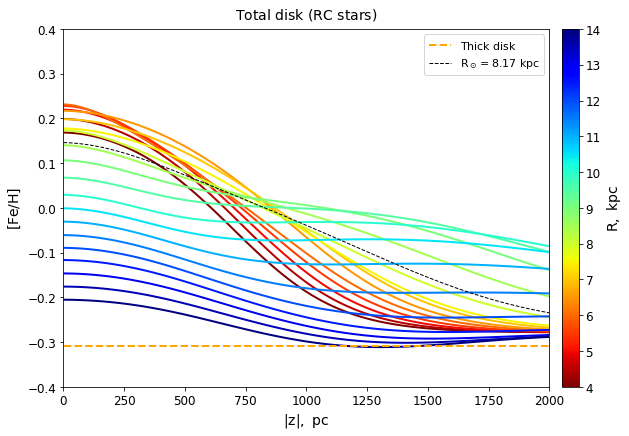

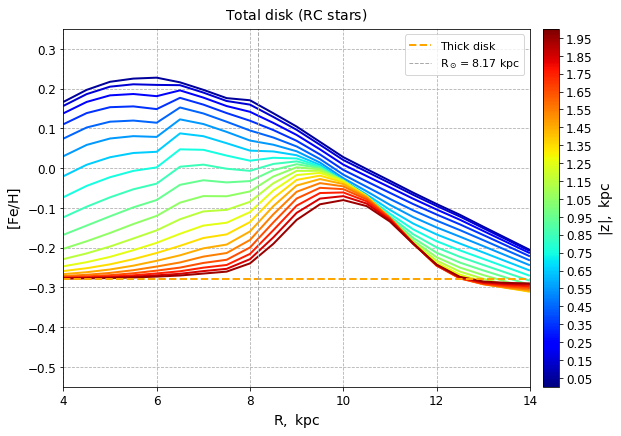

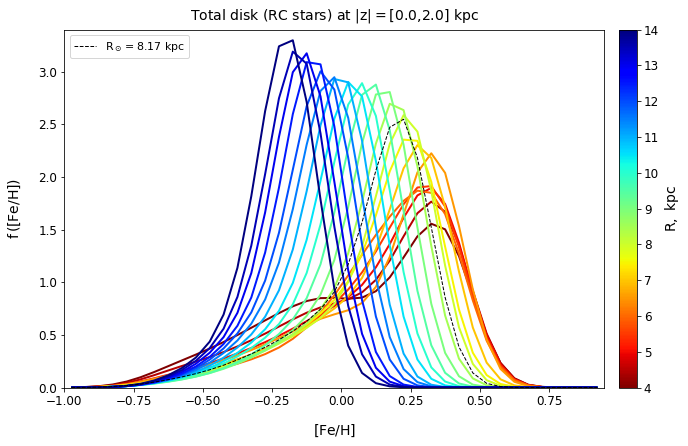

In [13]:
# --------------------------------------------------------------------------------------------------
# Metallicities
# --------------------------------------------------------------------------------------------------

# Vertical profiles of the mean metallicities:
P.metz_plt('dt',mode_pop='rc',number=True)

# Radial metallicity gradient in the different z-bins. 
# Note, that each method of the Plotting class returns figure and axes, so you can customize the plot. 
z_slices = np.arange(0,p.zmax+100,100)     # pc

f, ax = P.metr_plt('dt',z_slices,mode_pop='rc',number=True)
ax.grid(linestyle='--') 
ax.set_ylim(-0.55,0.35)

# Metallicity distributions at the different R: 
P.methist_plt('dt',[z_slices[0],z_slices[-1]],mode_pop='rc',number=True,
              sigma_gauss=0.1,metbins=np.arange(-1.0,1.0,0.05))


(<Figure size 648x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe55fa6b730>)

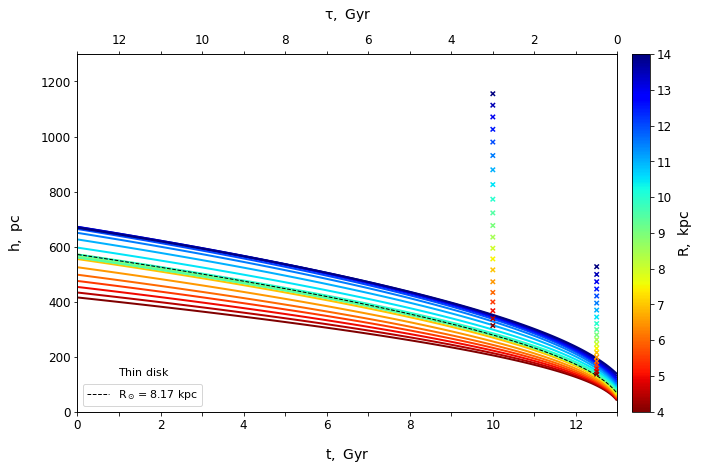

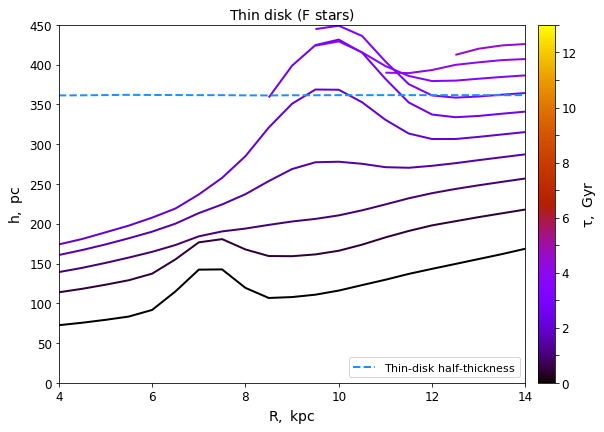

In [14]:
# --------------------------------------------------------------------------------------------------
# Scale heights
# --------------------------------------------------------------------------------------------------

# Scale heights of the thin-disk mono-age subpopulations. 
# As before, special subpopulations are marked with crosses. 
P.h_plt()

# We may also want to look at the radial change of scale height of some population
# (which may significantly differ from the overall disk thickness):
P.hr_monoage_plt('d',np.arange(0,tp+0.5,0.5),between=True,mode_pop='f',number=True)


(<Figure size 648x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe56ce12a60>)

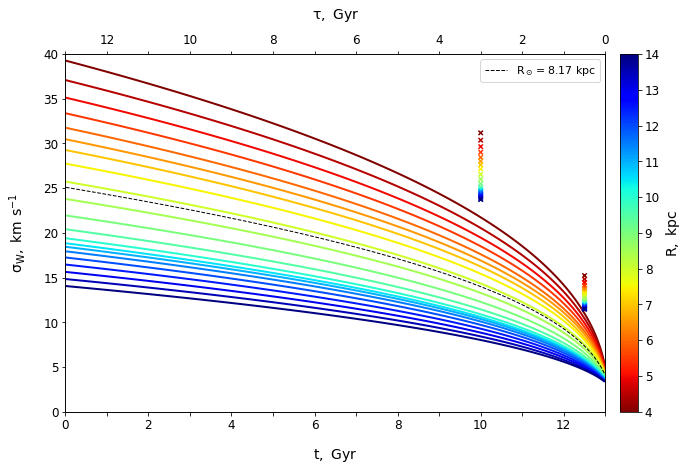

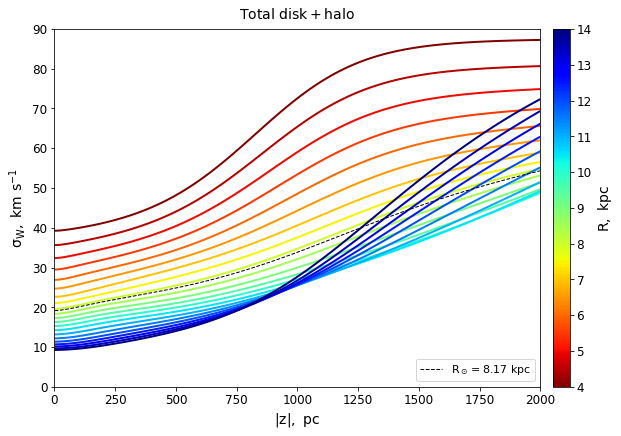

In [15]:
# --------------------------------------------------------------------------------------------------
# Kinematics part1
# --------------------------------------------------------------------------------------------------

# AVR:
P.avr_plt()

# Vertical profile of the W-velocity dispersion:
P.sigwz_plt('tot')

# Try also something more special and compare to the overall profile of the W-velocity dispersion:
#P.sigwz_plt('tot',mode_pop='f',number=True)


(<Figure size 648x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe55fdae2e0>)

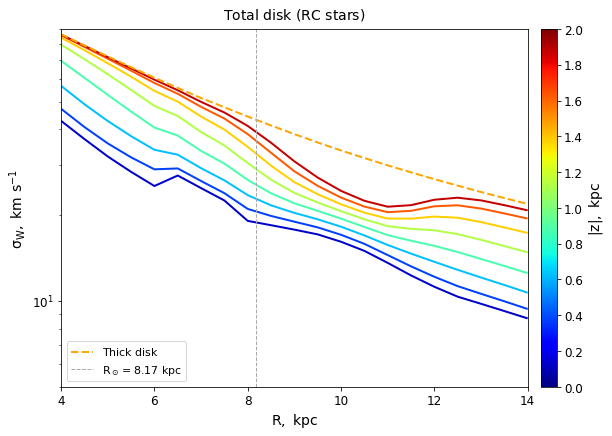

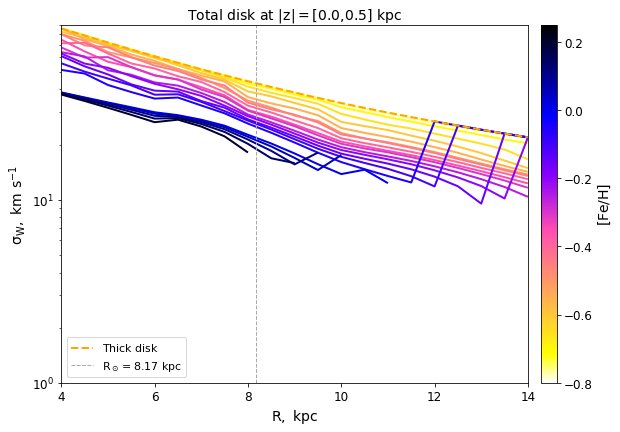

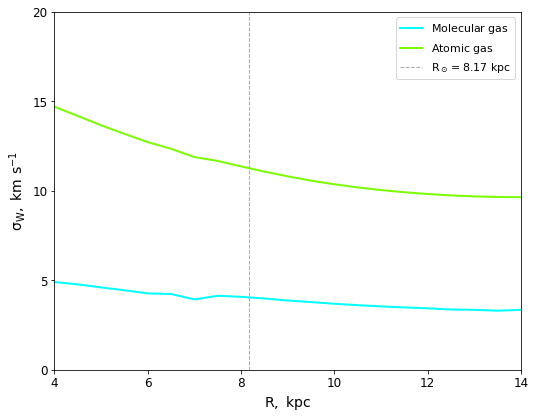

In [16]:
# --------------------------------------------------------------------------------------------------
# Kinematics part2
# --------------------------------------------------------------------------------------------------

# The vertical kinematics of the mono-age and mono-metallicity disk subpopulations 
# can be visualized like this: 

z_slices = np.arange(0,p.zmax+250,250)  # pc

# Radial profiles of the W-velocity dispersion for all disk stars:
P.sigwr_plt('dt',z_slices,mode_pop='rc',number=True) 

# For a special population try:
#P.sigwr_plt('dt',z_slices_set,mode_pop='rc',number=True) 

# For a single z-slice, W-velocity dispersion can be plotted in age- and metallicity-bins.
z_slice = [0,500]                          # pc,  range of heights
mets = np.arange(-0.8,0.3,0.05)            # dex, set of metallicities

P.sigwr_monomet_plt('dt',z_slice,mets)

# Or try other examples:
#P.sigwr_monomet_plt('tot',z_slice,mets,mode_pop='f',number=True)

# And for age-bins:
#ages = np.arange(0,tp+0.25,0.25)           # Gyr, set of ages
#P.sigwr_monoage_plt('dt',z_slice,ages)
#P.sigwr_monoage_plt('tot',z_slice,ages,mode_pop='f',number=True,between=True) 

# Also, let's check the resulting W-velocity dispersion of the two gas components:
P.sigwr_gas_plt()


(<Figure size 648x504 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe55fad8250>)

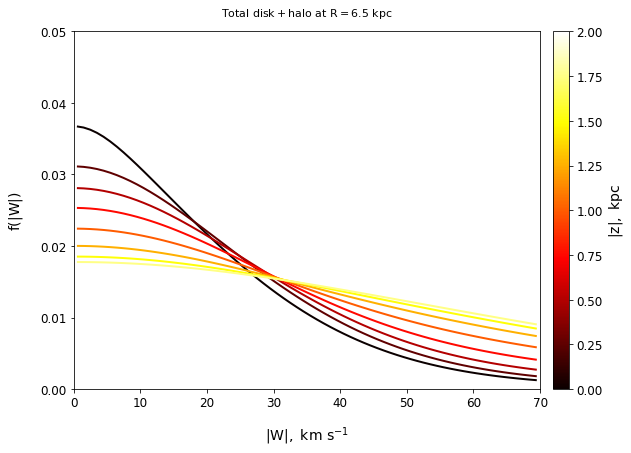

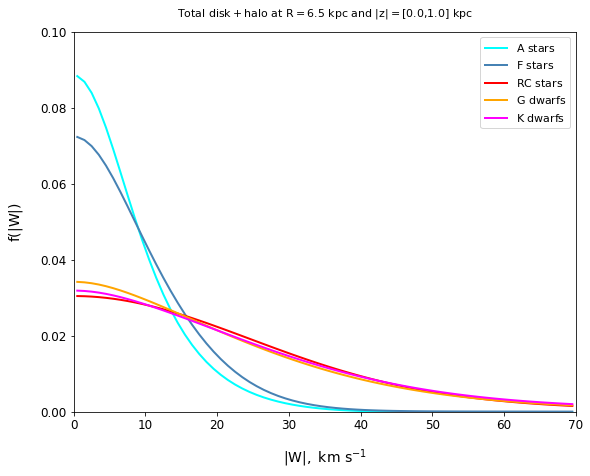

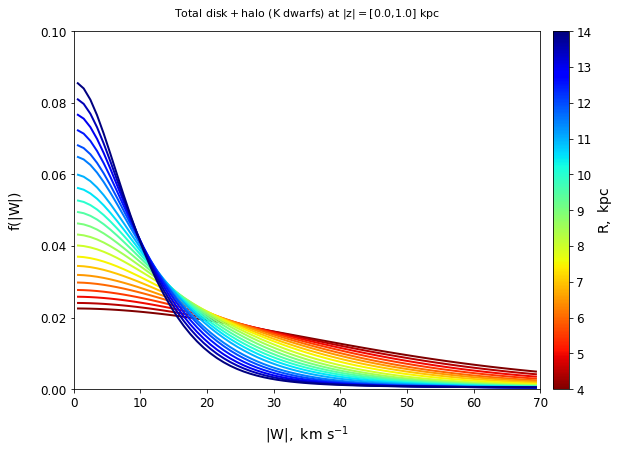

In [17]:
# --------------------------------------------------------------------------------------------------
# Kinematics part3
# --------------------------------------------------------------------------------------------------

# |W|-velocity distributions can be plotted for the different radii, z, ages, metallicities, and populations.
# The distributions are normalized to the area. 

radius = 6.5                            # kpc
z_slice = [0,1000]                      # pc
z_slices = np.arange(0,p.zmax+250,250)  # pc
ages = np.arange(0,tp+0.25,0.25)        # Gyr
mets = np.arange(-1,0.4,0.1)            # dex
w_max, delta_w = 70, 1                  # km/s


# Fixed R and different z:
P.fw_hist_plt('tot',radius,z_slices,wmax=w_max,dw=delta_w,cbar='hot')         

# Fixed R, single z-bin, different populations:
P.fw_hist_plt('tot',radius,z_slice,mode_pop=['a','f','rc','gdw','kdw'],number=True,wmax=w_max,dw=delta_w)
# Fixed R, single z-bin, single population, different ages or metallicities:
#P.fw_hist_plt('tot',radius,z_slice,ages=ages,mode_pop='kdw',number=True,wmax=w_max,dw=delta_w)
#P.fw_hist_plt('tot',radius,z_slice,mets=mets,mode_pop='kdw',number=True,wmax=w_max,dw=delta_w)

# Different R, single z-bin, single population:
P.fw_hist_plt('tot',a.R,z_slice,mode_pop='kdw',number=True,wmax=w_max,dw=delta_w)
# We can also add a cut on age or metallicity:
#P.fw_hist_plt('tot',a.R,z_slice,ages=[0,6],mode_pop='kdw',number=True,wmax=w_max,dw=delta_w)
#P.fw_hist_plt('tot',a.R,z_slice,mets=[-0.6,-0.2],mode_pop='kdw',number=True,wmax=w_max,dw=delta_w)


(<Figure size 720x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe55f68e6a0>)

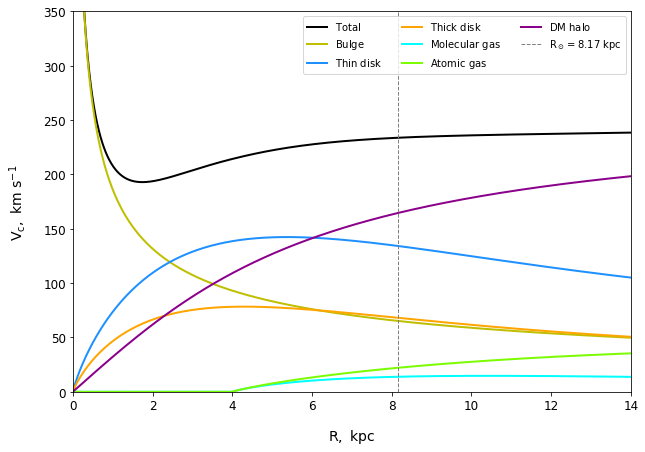

In [18]:
# --------------------------------------------------------------------------------------------------
# Kinematics part4
# --------------------------------------------------------------------------------------------------

# MW rotation curve:
P.rot_curve_plt()


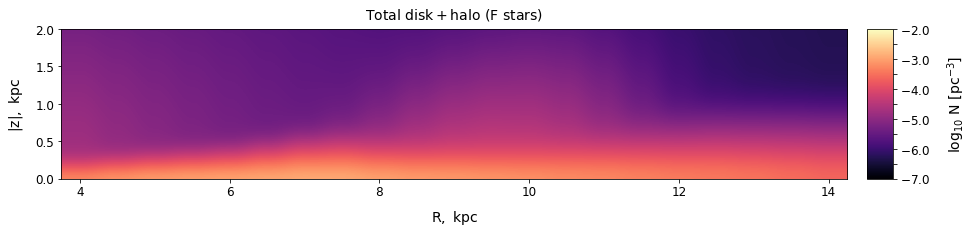

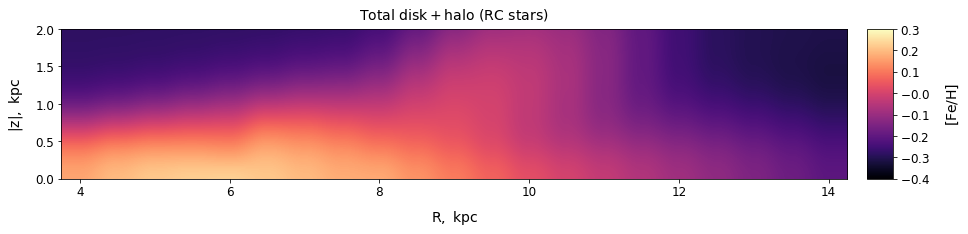

In [19]:
# --------------------------------------------------------------------------------------------------
# Rz-maps
# --------------------------------------------------------------------------------------------------

# Rz-maps help to visualize the overall distribution of stars (or their properties) in the disk. 
# Here we set the vertical z-step to 25 pc (default value is 100 pc, but then maps look a bit rough).

z_step = 25    # pc

P.rz_map_plt('tot',mode_pop='f',number=True,dz=z_step) 
# Compare to other populations:
#P.rz_map_plt('tot',mode_pop='rc',number=True,dz=z_step) 
#P.rz_map_plt('tot',mode_pop='gdw',number=True,dz=z_step) 

# Age, metallicity, and W-velocity dispersion can be also plotted on Rz-maps:
P.rz_map_quantity_plt('tot','FeH',mode_pop='rc',dz=z_step)
#P.rz_map_quantity_plt('tot','age',mode_pop='rc',dz=z_step)
#P.rz_map_quantity_plt('tot','sigw',mode_pop='rc',dz=z_step)

# In general, any quantity available in the SA tables can be plotted this way:
#P.rz_map_quantity_plt('tot','Mf',mode_pop='rc',dz=z_step)
#P.rz_map_quantity_plt('tot','logT',mode_pop='rc',dz=z_step)
#P.rz_map_quantity_plt('tot','logg',mode_pop='rc',dz=z_step)


(<Figure size 720x576 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3ee3f1e5b0>)

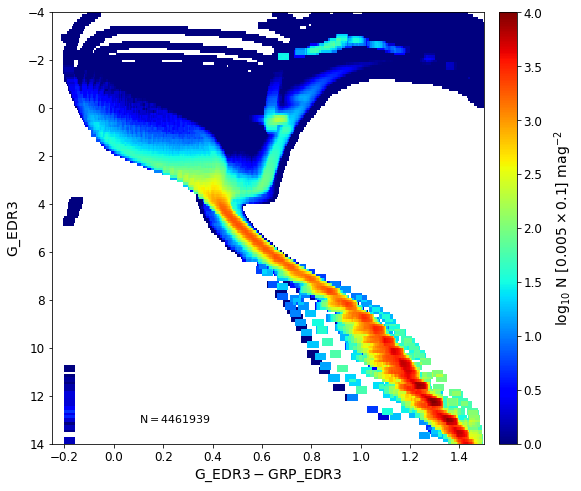

In [19]:
# --------------------------------------------------------------------------------------------------
# Hess diagrams
# --------------------------------------------------------------------------------------------------

# In addition to the local sphere and cylinder (see tutorial No.1), we can use {R,phi,z}-volume:
R = 10             # kpc
radius = 0.25      # kpc
z_slice = [0,200]  # pc
delta_phi = 10     # deg

P.hess_simple_plt('tot','rphiz_box',['G_EDR3','G_EDR3','GRP_EDR3'],
                       [[-0.25,1.5],[-4,14]],[0.005,0.1],smooth=[0.05,0.3],
                       R_minmax=[R-radius/2,R+radius/2],zlim=z_slice,dphi=delta_phi)


In [20]:
# And let's produce and save these plots automatically:

z_slices = np.arange(0,p.zmax,200)        # pc
age_bins = np.arange(0,tp+0.25,0.25)      # Gyr
met_bins = np.arange(-0.8,0.55,0.05)      # dex
sigma_age = 0.1                           # Gyr
sigma_met = 0.1                           # dex
rmax = 100                                # pc

PB = PlotBlocks(p,a,inp)
PB.basic_output(z_slices,age_bins,met_bins,sigma_age,sigma_met,rmax)    



Plotting block of figures for the JJ model... 
Input                     :  	ok 
Potential                 :  	ok 
Scale heights             :  	ok 
Densities                 :  	ok 
Ages                      :  	ok 
Metallicities             :  	ok 
Kinematics                :  	ok 
Populations               :  	ok 
RZ-maps                   :  	ok

PlotBlocks.basic_output:  0h 19m 49.68s
